In [1]:
import numpy as np
import os

import plugins.custom_config as custom_config
import plugins.bot_core as bot_core
import plugins.tool_dice as tool_dice
import plugins.info_help as info_help
import plugins.info_game as info_game
import plugins.utils as utils

from plugins import bot

b = bot

ujson module not found, using json


个人资料库加载成功!
找到以下查询资料: ['5e_00_spell_by_pear.json', '5e_01_armor_weapon_phb_by_xe.json', '5e_01_feat_by_pear.json', '5e_01_phb_classes_by_pear_hze_xe.json', '5e_01_phb_races_by_pear.json', '5e_02_phb_rule_by_pear.json', '5e_03_tools_phb_by_zxa.json', '5e_05_spell_list_by_pear.json', '5e_06_magic_items_dmg_by_hze.json', '5e_07_dmg_rule_by_pear.json', '5e_08_mm_by_hze_pear_query.json', '5e_08_phb_background_by_pear.json', '5e_09_creature_phb_dmg_by_hze.json', '5e_10_exp_classes_by_hh_pear.json', '5e_10_exp_magic_items_by_hh.json', '5e_10_exp_races_by_pear.json', '5e_10_xge_dm_tools_by_pear.json', '5e_19_egtw_by_pear_3_29.json', '5e_30_module_items_by_hh.json', 'syn_spell.json']
成功加载同义词表syn_spell.json, 共44个条目
查询资料库加载成功! 共3677个条目
找到以下牌堆: ['00_狂野魔法浪涌表_deck.json', '01_万象无常牌_deck.json', '05_短暂性疯狂_deck.json', '05_长期性疯狂_deck.json', '06_休克_deck.json', '06_伤残_deck.json', '20_天气_deck.json', '20_天气_温度_deck.json', '20_天气_降水_deck.json', '20_天气_风_deck.json', '21_魔法物品表a_deck.json', '21_魔法物品表b_deck.json',

In [4]:
# 检查发言情况
temp = []
total = 0
for gId in b.groupInfoDict:
    temp.append((gId, b.groupInfoDict[gId]['name'], b.groupInfoDict[gId]['messageAccu'], b.groupInfoDict[gId]['dndCommandAccu'],b.groupInfoDict[gId]['commandAccu'],
                b.groupInfoDict[gId]['messageDaily'], b.groupInfoDict[gId]['dndCommandDaily'],b.groupInfoDict[gId]['commandDaily']
                ,b.groupInfoDict[gId]['inviter'],b.groupInfoDict[gId]['days'], b.groupInfoDict[gId]['messageAccu']/(b.groupInfoDict[gId]['days']+1)))
    total += b.groupInfoDict[gId]['dndCommandAccu']
temp = sorted(temp, key = lambda x: -((x[2]/(x[9]+1)+x[5])/(x[3]*0.8+x[6]+x[4]*0.1+x[7]*0.2+0.5))*(x[9]+1))
print(len(temp), total)
print(temp)

520 239835


[('973264010', '未知群名称', 3574, 0, 0, 84, 0, 0, '', 5, 595.6666666666666),
 ('785702914', '未知群名称', 5451, 0, 3, 22, 0, 0, '', 9, 545.1),
 ('681172889', '未知群名称', 1370, 0, 0, 23, 0, 0, '', 6, 195.71428571428572),
 ('387177803', '未知群名称', 4112, 1, 2, 4, 0, 0, '', 9, 411.2),
 ('881011227', '未知群名称', 4372, 1, 5, 0, 0, 0, '', 10, 397.45454545454544),
 ('623415279', '未知群名称', 1818, 1, 2, 215, 0, 0, '', 7, 227.25),
 ('1150498804', '未知群名称', 3000, 1, 7, 207, 0, 0, '', 4, 600.0),
 ('922577245', '未知群名称', 7503, 4, 15, 3, 0, 0, '', 37, 197.44736842105263),
 ('964121483', '未知群名称', 552, 0, 0, 27, 0, 0, '', 4, 110.4),
 ('834764198', '未知群名称', 36391, 38, 78, 259, 0, 0, '', 41, 866.452380952381),
 ('951064304', '未知群名称', 1695, 1, 2, 0, 0, 0, '', 4, 339.0),
 ('540533096', '未知群名称', 438, 0, 0, 11, 0, 0, '', 5, 73.0),
 ('475655228', '未知群名称', 2294, 2, 5, 14, 0, 0, '', 6, 327.7142857142857),
 ('1124522467', '未知群名称', 3887, 5, 8, 95, 0, 0, '', 8, 431.8888888888889),
 ('154920765', '未知群名称', 1832, 2, 2, 15, 0, 0, '', 9, 1

In [6]:
total = 0
total_com = 0
max_credit = 0
max_uid = ''
for gId in b.userInfoDict:
    total_com += b.userInfoDict[gId]['commandAccu']
    if b.userInfoDict[gId]['credit'] > 100:
        total += 1
    if b.userInfoDict[gId]['credit'] > max_credit:
        max_credit = b.userInfoDict[gId]['credit']
        max_uid = gId
print(total)
print(max_uid, max_credit)
print(total_com)

2249
1593230397 3301
980980


3347
573


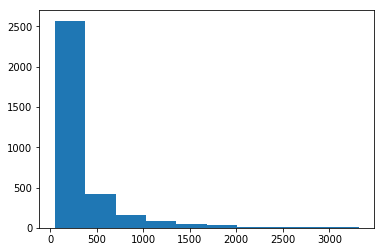

In [4]:
import matplotlib.pyplot as plt
credits =[]
temp = 0
for uid in b.userInfoDict:
    if b.userInfoDict[uid]['credit'] >= 50:
        credits.append(b.userInfoDict[uid]['credit'])
    if b.userInfoDict[uid]['credit'] >= 500:
        temp += 1
# print(sorted(credits, key = lambda x: -1*x))
print(len(credits))
print(temp)
plt.hist(credits)
plt.show()

In [4]:
# # %%time
# # # 计算期望
# import math

# # xDyKz
# def ComputeException(x, y, z = 1):
#     return z + z*(y-1)*(2*x-z+1)/(2*x+2)+0.5
# print(ComputeException(x=4, y=6, z = 3))
# print(ComputeException(x=2, y=20, z = 1))
# n = 5000
# times = 0
# error = 0
# for x in [4, 6, 8, 10]:
#     for y in [4, 6, 8, 10]:
#         for z in [1, 2, 3, 4]:
#             for r in range(10):
#                 total = 0
#                 for i in range(n):
#                     error, output, rollResult = tool_dice.RollDiceCommand(f'{x}d{y}k{z}')
#                     total += rollResult.totalValueList[0]
#                 mean = total/n
#                 exp = ComputeException(x, y, z)
#                 error += mean-exp
#                 times+=1
# print(error/times)

# # ${\sum_{i=1}^z(1+\frac{(x-i+1)(y-1)}{x+1})}$
# # ${=z+\sum_{i=1}^z\frac{(x-i+1)(y-1)}{x+1}}$
# # ${=z+\frac{y-1}{x+1}\sum_{i=1}^z(x-i+1)}$
# # ${=z+\frac{y-1}{x+1}(zx+z+\sum_{i=1}^z(-i))}$
# # ${=z+\frac{y-1}{x+1}(zx+z+\frac{-z(1+z)}{2})}$
# # ${=z+\frac{y-1}{x+1}\frac{2zx+2z-z-z^2)}{2}}$
# # ${=z+\frac{z(y-1)}{x+1}\frac{(2x-z+1)}{2}}$
# # ${=0.5+z+\frac{z(y-1)(2x-z+1)}{2x+2}}$

12.5
14.166666666666666
0.0006631534090909219


In [2]:
# # 录入查询资料
# queryDict = {}

# fileName = '5E_法术大全_by梨子'
# title = ''
# content = ''
# with open(f'../资料/{fileName}.txt', 'r', encoding="utf-8-sig") as f:
#     data = f.readline().strip()
#     while data:
#         data = data.strip()
#         if not data:
#             if title:
#                 if len(title) > 20:
#                     print("Title too long?"+title+"##"+content)
#                 elif len(content) < 20:
#                     print("Content too small?"+title+"##"+content)
#                 content = content.replace('【换行】', '\n')
#                 queryDict[title] = content[:-1]
#             title = ''
#             content = ''
#         else:
#             if not title:
#                 title = data
#             else:
#                 content += data.strip() + '\n'
#         data = f.readline()
# content = content.replace('【换行】', '\n')
# queryDict[title] = content[:-1]
# print(queryDict.keys())
# print(queryDict[list(queryDict.keys())[0]])
# utils.UpdateJson(queryDict, f'./plugins/custom_data/{fileName}_query.json')

dict_keys(['酸液飞溅', '援助术', '警报术', '变身术', '化兽为友', '动物信使', '动物形态', '操纵死尸', '活化物件', '防活物护罩', '反魔法力场', '嫌恶/关怀术', '秘法眼', '秘法门', '秘法锁', '艾嘉西斯之铠', '哈达之臂', '星界投影', '卜筮术', '生命灵光', '净化灵光', '活力灵光', '启蒙术', '灾祸术', '放逐斩', '放逐术', '树肤术', '希望信标', '野兽知觉', '降咒', '毕格比之手', '剑刃护壁', '剑刃防护', '祝福术', '枯萎术', '致盲斩', '目盲/耳聋术', '闪现术', '朦胧术', '印记斩', '燃烧之手', '召雷术', '安定心神', '连锁闪电', '魅惑人类', '冻寒之触', '繁彩球', '死亡法阵', '原力法阵', '鹰眼术', '克隆术', '匕首之云', '死云术', '七彩喷射', '命令术', '通神术', '问道自然', '强令对决', '通晓语言', '强迫术', '寒冰锥', '困惑术', '召唤动物', '召唤箭雨', '召唤天界生物', '召唤元素生物', '召唤精类生物', '召唤次级元素生物', '万箭齐发', '召唤林地之精', '异界探知', '疫病术', '触发术', '不灭明焰', '操控水体', '操控天气', '警戒之箭', '法术反制', '造粮术', '造水/枯水术', '唤起死灵', '造物术', '疯狂冠冕', '十字军披风', '疗伤术', '舞光术', '黑暗术', '黑暗视觉', '昼明术', '防死结界', '延迟爆裂火球', '创造半位面', '湮灭波', '侦测善恶', '侦测魔法', '侦测毒性和疾病', '侦测思想', '任意门', '易容术', '解离术', '反制善恶', '解除魔法', '不谐低语', '预言术', '神恩', '圣言术', '支配野兽', '支配怪物', '支配人类', '卓姆吉瞬间召唤', '托梦术', '德鲁伊伎俩', '地震术', '魔能爆', '元素武器', '强化属性', '变巨/缩小术', '诱捕打击', '纠缠术', '注目术', '以太化', '艾伐黑触手', '脚底抹油', '摄心目光', '鬼斧神工', '妖火'

In [8]:
# # 录入牌堆
# import re
# fileName = '库藏宝藏cr17+'
# deckTitle = ''
# deckList = []
# deckRelayList = []
# deckDict = {}
# totalWeight = 0
# keyList = [['WEIGHT', re.compile('WEIGHT\(.*?\)')], ['ROLL', re.compile('ROLL\(.*?\)')],
#            ['DRAW', re.compile('DRAW\(.*?\)')], ['END', re.compile('END\(\)')]]
# with open(f'../资料/牌堆/{fileName}.txt', 'r', encoding="utf-8-sig") as f:
#     data = f.readline().strip()
#     deckTitle = data
#     data = f.readline().strip()
#     if data[:3] == '依赖:':
#         deckRelayList = data[3:].split('/')
#         deckRelayList = [relay.strip() for relay in deckRelayList]
#         data = f.readline().strip()
#     while data:
#         weight = 1
#         end = False
#         rawContent = data
#         content = []
#         for key in keyList:
#             resultList = key[1].findall(data)
#             if resultList:
#                 if key[0] == 'WEIGHT':
#                     assert len(resultList) == 1, 'WEIGHT指令只能出现一次'
#                     weight = int(resultList[0][7:-1])
#                     data = data.replace(resultList[0], '')
#                     assert weight >= 1
#                 elif key[0] == 'END':
#                     assert len(resultList) == 1, 'END指令只能出现一次'
#                     end = True
#                     data = data.replace(resultList[0], '')
#                 else:
#                     for result in resultList:
#                         index = data.find(result)
#                         arg = data[index+len(key[0])+1:index+len(result)-1]
#                         if index != 0:
#                             if data[:index].split():
#                                 content.append(['TEXT',data[:index].replace('\\n', '\n')])
#                         if key[0] == 'DRAW':
#                             targetDeck = arg.split('/')[0]
#                             assert len(arg.split('/')) <= 2
#                             assert targetDeck == deckTitle or targetDeck in deckRelayList, targetDeck
#                         elif key[0] == 'ROLL':
#                             assert tool_dice.isDiceCommand(arg)
#                         content.append([key[0],arg])
#                         data = data[index+len(result):]
#         if data.split():
#             content.append(['TEXT', data.replace('\\n', '\n')])
#         assert content, rawContent
#         totalWeight += weight
#         deckList.append({'weight':weight, 'content':content, 'end':end, 'raw':rawContent})
#         data = f.readline().strip()

# deckDict['title'] = deckTitle
# deckDict['relay'] = deckRelayList
# deckDict['totalWeight'] = totalWeight
# deckDict['list'] = deckList
# utils.UpdateJson(deckDict, f'./plugins/custom_data/{fileName}_deck.json')
# print(deckDict)

In [9]:
# # 录入菜谱
# fileName = '饮料与酒水'
# cookDict = {}
# curName = ''
# with open(f'../资料/菜谱/{fileName}.txt', 'r', encoding="utf-8-sig") as f:
#     data = f.readline().strip()
#     while data:
#         data = data.split(':')
#         if data[0] == '名称':
#             cookDict[data[1]] = {}
#             curName = data[1]
#         if data[0] == '美味' or data[0] == '难度':
#             data[1] = int(data[1])
#         if data[0] == '菜系' or data[0] == '种类' or data[0] == '风格':
#             data[1] = data[1].split('/')
#         cookDict[curName][data[0]] = data[1]
#         data = f.readline().strip()
#         if data == '':
#             data = f.readline().strip()
#             cookDict[curName]['关键词'] = cookDict[curName]['菜系'] + cookDict[curName]['种类'] + cookDict[curName]['风格']
# print(cookDict)
# utils.UpdateJson(cookDict, f'./plugins/custom_data/{fileName}_menu.json')

In [10]:
# # 录入笑话
# joke_path = '../资料/笑话'
# filesPath = os.listdir(joke_path) #读取所有文件名
# for fp in filesPath: # 去除文件名中的空格
#     absPath = os.path.join(joke_path, fp)
#     fpNew = fp.replace(' ', '')
#     absPathNew = os.path.join(joke_path, fpNew)
#     os.rename(absPath, absPathNew)
# filesPath = os.listdir(joke_path) #再次读取所有文件名
# filesPath = sorted(filesPath)
# jokeDict = {}
# jokeListStr = []
# jokeListImg = []
# for fp in filesPath:
#     try:
#         if fp[-4:] == '.txt':
#             print('txt', fp)
#             absPath = os.path.join(joke_path, fp)
#             with open(absPath, 'r') as f:
#                 jokeCur = ''
#                 data = f.readline()
#                 while data:
#                     jokeCur += data
#                     data = f.readline()
#                 jokeCur = jokeCur.strip()
#                 if jokeCur:
#                     jokeListStr.append(jokeCur)
#         elif fp[-4:] == '.png' or fp[-4:] == '.gif' or fp[-4:] == '.jpg':
#             print('img', fp)
#             jokeListImg.append(fp)
#     except Exception as e:
#         print(f'error:{e}')
# assert len(jokeListStr) > 0
# print(f'笑话资料库加载成功! 共{len(jokeListStr)}个文字条目, {len(jokeListImg)}个图片条目')
# jokeDict['word'] = jokeListStr
# jokeDict['img'] = jokeListImg
# utils.UpdateJson(jokeDict, f'./plugins/custom_data/joke.json')

img Fredrik(1).jpg
img Fredrik(10).jpg
img Fredrik(11).jpg
img Fredrik(12).jpg
img Fredrik(13).jpg
img Fredrik(15).jpg
img Fredrik(16).jpg
img Fredrik(17).jpg
img Fredrik(18).jpg
img Fredrik(2).jpg
img Fredrik(20).jpg
img Fredrik(21).jpg
img Fredrik(22).jpg
img Fredrik(23).jpg
img Fredrik(24).jpg
img Fredrik(25).jpg
img Fredrik(28).jpg
img Fredrik(29).jpg
img Fredrik(3).jpg
img Fredrik(30).jpg
img Fredrik(31).jpg
img Fredrik(32).jpg
img Fredrik(33).jpg
img Fredrik(4).jpg
img Fredrik(5).jpg
img Fredrik(8).jpg
img english(1).jpg
img english(1).png
img english(10).jpg
img english(11).jpg
img english(12).jpg
img english(13).jpg
img english(14).jpg
img english(15).jpg
img english(16).jpg
img english(17).jpg
img english(18).jpg
img english(19).jpg
img english(2).jpg
img english(2).png
img english(20).jpg
img english(3).jpg
img english(3).png
img english(4).jpg
img english(4).png
img english(5).jpg
img english(5).png
img english(6).jpg
img english(7).jpg
img english(8).jpg
img english(9).jpg


In [4]:
# # 录入同义词
# synDict = {}
# fileName = 'syn_spell'
# with open(f'../资料/{fileName}.txt', 'r', encoding="utf-8-sig") as f:
#     data = f.readline().strip()
#     while data:
#         synInfo = data.split(':')
#         synInfo[0] = synInfo[0].split('/')
#         for syn in synInfo[0]:
#             synDict[syn] = synInfo[1]
#         data = f.readline().strip()
# print(synDict)
# utils.UpdateJson(synDict, f'./plugins/custom_data/{fileName}.json')

In [12]:
# # 检索职业和法术列表
# queryDict = {}

# fileName = '5E_法术列表_by梨子'
# title = ''
# content = ''
# with open(f'../资料/{fileName}.txt', 'r', encoding="utf-8-sig") as f:
#     data = f.readline().strip()
#     while data:
#         data = data.strip()
#         if not data:
#             if title:
#                 title = title.split(':')[0]
#                 try:
#                     queryDict[title] += ' ' + content[:-1]
#                 except:
#                     queryDict[title] = content[:-1]
#             title = ''
#             content = ''
#         else:
#             if not title:
#                 title = data
#             else:
#                 content += data.strip() + '\n'
#         data = f.readline()
        
# title = title.split(':')[0]
# queryDict[title] += ' ' + content[:-1]
# # print(queryDict.keys())
# # print(queryDict[list(queryDict.keys())[0]])
# target = '典礼术'
# result = '（'
# for c in queryDict.keys():
#     if target in queryDict[c]:
#         result += c + '，'
# result = result[:-1] + '）'
# print(result)

In [13]:
# # 录入姓氏
# import xlrd
# nameDict = {}
# data = xlrd.open_workbook('../资料/姓名/姓名大全.xlsx')
# raceList = data.sheet_names()
# nameDict['meta'] = {}
# nameDict['info'] = {}
# for i in range(len(raceList)):
#     race = raceList[i]
#     nameDict['info'][race] = []
#     table = data.sheet_by_index(i)
#     for j in range(table.ncols//2):
#         resultCol = []
#         firstCol = table.col_values(j*2)
#         secondCol = table.col_values(j*2+1)
#         firstValid = 0
#         secondValid = 0
#         for k in range(1, len(firstCol)):
#             if firstCol[k].strip(): firstValid = k
#         for k in range(1, len(secondCol)):
#             if secondCol[k].strip(): secondValid = k
#         assert firstValid == secondValid
#         for k in range(1, firstValid):
#             resultCol.append([firstCol[k], secondCol[k]])
#         assert len(resultCol) != 0
#         nameDict['info'][race].append(resultCol)

# with open('../资料/姓名/name_config.txt', 'r', encoding="utf-8-sig") as f:
#     data = f.readline().strip()
#     while data:
#         temp = data.split(':')
#         index = temp[0]
#         targetList = temp[1].split('|')
#         detail = []
#         for t in targetList:
#             detail.append(t.split('-'))
#             assert len(detail[-1]) > 1
#             assert detail[-1][0] in nameDict['info'].keys()
#             for d in range(1,len(detail[-1])):
#                 detail[-1][d] = int(detail[-1][d])
#                 assert detail[-1][d] >= 0
#                 assert detail[-1][d] < len(nameDict['info'][detail[-1][0]])
#         nameDict['meta'][index] = detail
#         data = f.readline().strip()
# print(raceList)
# print(nameDict['meta'])
# utils.UpdateJson(nameDict, f'./plugins/custom_data/name.json')

In [14]:
# # 录入题目
# questionDict = {}
# sourcePath = '../资料/题目'
# filesPath = os.listdir(sourcePath) #读取所有文件名
# filesPath = sorted(filesPath)
# for fp in filesPath:
#     assert fp[-4:] == '.txt'
#     title = fp[:-4]
#     questionDict[title] = []
#     absPath = os.path.join(sourcePath, fp)
#     with open(absPath, 'r', encoding="utf-8-sig") as f:
#         data = f.readline().strip()
#         tempQuestion = ['', '', '']
#         index = 0
#         while data:
#             content = ''
#             if data[:2] == '题目':
#                 index = 0
#                 content = data[3:].strip() # 考虑中间有一个分隔符
#             elif data[:2] == '答案':
#                 index = 1
#                 content = data[3:].strip()
#                 assert content in ['T', 'F', 'A','B', 'C', 'D']
#             elif data[:2] == '解析':
#                 index = 2
#                 content = data[3:].strip()
#             else:
#                 content = '\n' + data
#             tempQuestion[index] = tempQuestion[index] + content
#             data = f.readline().strip()
#             if not data:
#                 assert len(tempQuestion[0]) != 0 and len(tempQuestion[1]) != 0
#                 questionDict[title].append(tempQuestion)
#                 tempQuestion = ['', '', '']
#                 index = 0
#                 data = f.readline().strip()
#     assert len(questionDict[title]) != 0
#     print(len(questionDict[title]))
# utils.UpdateJson(questionDict, f'./plugins/custom_data/question.json')

In [15]:
### # 将chm表格排版
# fileName = '职业表'
# result = ''
# indexRange = list(range(0,99)) #+[0]
# index = 0
# # split = '    '
# # split = '/'
# split = '  '
# with open(f'../资料/{fileName}.txt', 'r', encoding="utf-8-sig") as f:
#     data = f.readline().strip()
#     while data:
#         if index in indexRange:
#             result += data + split
#         index += 1
#         data = f.readline().strip()
#         if data == '':
#             data = f.readline().strip()
#             result = result[:-1].strip() + '\n'
#             index = 0
# result = result.replace('—', '-')
# print(result)